# Comparison of selected regression models 
## * Decission Tree
## * Random Forest
## * k-Nearest Neighbors

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score, plot_roc_curve,mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier,RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor 

In [52]:
data=pd.read_excel('C:/Users/Dell/OneDrive/Pulpit/github/purchase.xlsx')
data.head()

,assortment,service,day,income,other,internet,credit_card,age,sex,loan,distance,purchases
0,54,64,2,2.1,3,0,0,54,0,1,1.6,1
1,86,88,6,2.3,2,0,1,72,1,1,6.5,1
2,56,60,2,2.1,3,0,0,56,1,0,0.4,1
3,54,61,2,2.1,3,0,1,60,1,1,6.5,1
4,63,60,2,2.1,3,0,0,41,1,1,7.3,1


In [54]:
# Selecting variables
purchase = data[['service','assortment', 'day', 'income', 'internet', 'credit_card', 'age', 'sex', 'loan', 'distance', 'other']]
purchase.head()

,service,assortment,day,income,internet,credit_card,age,sex,loan,distance,other
0,64,54,2,2.1,0,0,54,0,1,1.6,3
1,88,86,6,2.3,0,1,72,1,1,6.5,2
2,60,56,2,2.1,0,0,56,1,0,0.4,3
3,61,54,2,2.1,0,1,60,1,1,6.5,3
4,60,63,2,2.1,0,0,41,1,1,7.3,3


In [75]:
X = purchase.iloc[:,1:]
y = purchase['service']
print(X)
print(y)

      assortment  day  income  internet  credit_card  age  sex  loan  \
0             54    2     2.1         0            0   54    0     1   
1             86    6     2.3         0            1   72    1     1   
2             56    2     2.1         0            0   56    1     0   
3             54    2     2.1         0            1   60    1     1   
4             63    2     2.1         0            0   41    1     1   
...          ...  ...     ...       ...          ...  ...  ...   ...   
7764           8    3     1.6         1            1   51    0     1   
7765          10    3     2.6         1            1   31    0     1   
7766          46    2     1.8         1            1   60    0     0   
7767          16    3     2.4         1            1   55    0     1   
7768          28    6     2.2         1            1   47    0     0   

      distance  other  
0          1.6      3  
1          6.5      2  
2          0.4      3  
3          6.5      3  
4          7.3 

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.20, 
                                                    random_state=30)

## Decission Tree

In [77]:
dt_reg = DecisionTreeRegressor(max_depth=3)

dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [72]:
y_pred = dt_reg.predict(X_test)

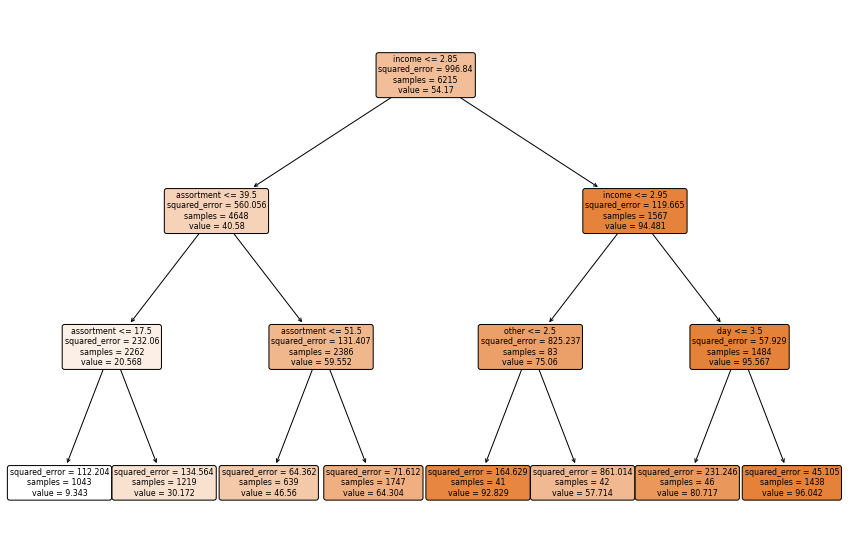

In [78]:
plt.figure(figsize=(15,10))
figure = plot_tree(dt_reg,
                   feature_names=X.columns, 
                   filled=True, 
                   rounded=True) 

Quality evaluation

In [79]:
mse = mean_squared_error(y_test,y_pred)
rmse = mse ** (1 / 2)
print('MSE:', mse)
print('RMSE:', rmse)

MSE: 12.966838350957758
RMSE: 3.6009496457126082


In [80]:
y_mean = y_test.mean()
print(y_mean)
print(rmse/y_mean * 100)

53.91827541827542
6.678532682616326


Variables importance

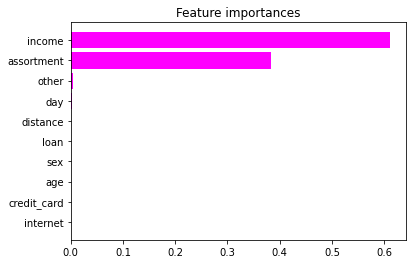

In [62]:
features = pd.DataFrame(dt_reg.feature_importances_, 
                        index=X.columns, 
                        columns=['Importances'])  
features.sort_values(by=['Importances'], inplace=True)

plt.barh(features.index, features['Importances'], color='magenta')
plt.title('Feature importances')
plt.show()

## Random Forest

In [63]:
rf_reg = RandomForestRegressor(n_estimators=200,
                               random_state=30)

rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=30)

In [64]:
y_pred = rf_reg.predict(X_test)

Quality evaluation

In [65]:
mse = mean_squared_error(y_test,y_pred)
rmse = mse ** (1 / 2)
print('MSE:', mse)
print('RMSE:', rmse)

MSE: 26.794806731731732
RMSE: 5.176370034274186


In [66]:
y_mean = y_test.mean()
print(y_mean)
print(rmse/y_mean * 100)

53.91827541827542
9.600399853515478


In [67]:
#Coefficient of determination
rf_reg.score(X_test, y_test)

0.9724379360143556

Variables importance

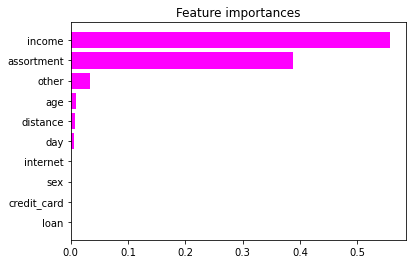

In [68]:
features = pd.DataFrame(rf_reg.feature_importances_, 
                        index=X.columns, 
                        columns=['Importances'])  
features.sort_values(by=['Importances'], inplace=True)

plt.barh(features.index, features['Importances'], color='magenta')
plt.title('Feature importances')
plt.show()

## k- Nearest Neighbors

In [44]:
# Standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [45]:
kNN_reg = KNeighborsRegressor(n_neighbors=7)

kNN_reg.fit(X_train_std, y_train)

KNeighborsRegressor(n_neighbors=7)

In [46]:
y_pred = kNN_reg.predict(X_test_std)

Quality evaluation

In [47]:
mse = mean_squared_error(y_test,y_pred)
rmse = mse ** (1 / 2)
print('MSE:', mse)
print('RMSE:', rmse)

MSE: 65.99674309878392
RMSE: 8.123837953749689


In [48]:
y_mean = y_test.mean()
print(y_mean)
print(rmse/y_mean * 100)

53.91827541827542
15.06694695022857


In [49]:
# Hyperparameter tuning
param = GridSearchCV(kNN_reg,
                          param_grid={'n_neighbors':[3,5,7,9,11]},
                          cv=3,
                          scoring='neg_mean_squared_error')
param.fit(X_train_std, y_train)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(n_neighbors=7),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]},
             scoring='neg_mean_squared_error')

In [50]:
print(param.best_params_)
print(param.best_score_)

{'n_neighbors': 5}
-70.02604949330929
